# Importing the Required Libraries

In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import ast
from sklearn.model_selection import cross_val_score, KFold

## Creating Data Frame

In [92]:
df = pd.read_csv('trial3.csv')

### To Print first 5 rows of the data frame

In [93]:
df.head()

,feature,class
0,[-217.35526 70.22338 -130.38527 -5...,dog_bark
1,[-4.2409818e+02 1.0934077e+02 -5.2919525e+01 ...,children_playing
2,[-4.5879114e+02 1.2138419e+02 -4.6520657e+01 ...,children_playing
3,[-413.89984 101.66373 -35.42945 5...,children_playing
4,[-4.4660352e+02 1.1368541e+02 -5.2402206e+01 ...,children_playing


In [94]:
X = np.array(df['feature'].tolist())

In [95]:
X

array(['[-217.35526      70.22338    -130.38527     -53.282898    -21.19913\n  -22.677622    -10.85597      18.294254      6.652703     14.324025\n  -12.167682      2.276837    -17.779188     10.388951     -6.5828357\n   -0.69445693  -18.336023      1.9942534    -5.143332      8.3024\n  -12.645056     -6.529732      4.6176677    -2.1799166    -6.662824\n    0.35971075   -3.9084098     4.7756243    -6.384521     -5.379818\n    0.9159783     6.9704943    -0.248668      1.6782187    -5.611182\n   -2.9643466     3.1490574    -1.693053     -0.61698383    0.3860054 ]',
       '[-4.2409818e+02  1.0934077e+02 -5.2919525e+01  6.0864750e+01\n  2.4529226e-01  1.7347328e+01  2.0955827e+00  1.0712965e+01\n -1.3986130e+00  1.2310798e+01 -1.1208863e+01  2.1075323e+01\n -9.4902792e+00  1.3526470e+01 -2.3910522e-01  7.1590004e+00\n -3.0809762e+00  1.1367645e+01 -6.3027668e+00  6.8781147e+00\n -2.8902097e+00  8.7614346e+00 -2.3304420e+00  8.4166384e+00\n -1.6700817e+00  1.2775005e+00 -4.4198775e+00  1.2

In [96]:
preprocessed_features = df['feature'].str.replace('[', '').str.replace(']', '').str.strip()

In [97]:
X = np.array([list(map(float, x.split())) for x in preprocessed_features], dtype=float)

In [98]:
y=np.array(df['class'].tolist())

In [99]:
print(X)

[[-2.1735526e+02  7.0223380e+01 -1.3038527e+02 ... -1.6930530e+00
  -6.1698383e-01  3.8600540e-01]
 [-4.2409818e+02  1.0934077e+02 -5.2919525e+01 ...  5.3489327e-01
  -5.4468721e-01  4.4632098e-01]
 [-4.5879114e+02  1.2138419e+02 -4.6520657e+01 ...  2.0768483e+00
   1.6962965e+00 -9.6140963e-01]
 ...
 [-3.0388824e+02  1.1135945e+02 -4.5941563e+01 ... -3.0292380e+00
   2.7170298e+00  7.6197419e+00]
 [-3.4411008e+02  1.2545021e+02 -5.4903442e+01 ... -7.9082437e+00
  -1.6414586e+00  5.6668439e+00]
 [-3.1560280e+02  9.4854805e+01 -3.7222340e+01 ...  6.1386460e-01
  -1.1449189e+01 -6.0105853e+00]]


In [100]:
print(y)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


### Splitting the dataset into train and test data

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [102]:
print(X_train)

[[-2.0281561e+02  9.0853767e+01 -1.5599918e+01 ... -1.2615989e-01
   1.5849239e+00  3.6405079e+00]
 [-3.4014130e+02  6.6774826e+01 -5.3332430e+00 ...  1.8007597e+00
  -7.7393765e+00  1.5943365e+00]
 [-4.9140331e+01  5.8599373e+01 -4.6638958e+01 ...  1.6676491e-01
  -5.8130422e+00 -7.8402179e-01]
 ...
 [-4.1301086e+02  1.4217776e+02 -2.3983858e+01 ... -5.5213118e-01
  -3.5845306e+00 -9.4187123e-01]
 [-2.1355418e+02  1.4810828e+02 -2.9893005e+01 ... -1.6761602e+00
   1.4046030e+00  1.4412450e+00]
 [-2.8706436e+02  1.8691911e+02 -4.8414795e+01 ... -4.1952372e+00
   5.5748384e-02  8.5477322e-01]]


In [103]:
class_labels = np.unique(y)
print(class_labels)

['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


# Executing KNN

In [104]:
k=1
knn1 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn1.fit(X_train, y_train)
y_pred_euclidean = knn1.predict(X_test)

k=2
knn2 = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
knn2.fit(X_train, y_train)
y_pred_chebyshev = knn2.predict(X_test)

k=1
knn3 = KNeighborsClassifier(n_neighbors=k, metric='cosine')
knn3.fit(X_train, y_train)
y_pred_cosine = knn3.predict(X_test)

# Print the predicted labels
print("Euclidean:", y_pred_euclidean)
report_euclidean = classification_report(y_test, y_pred_euclidean)
print(report_euclidean)
print("##################")
print("Chebyshev:", y_pred_chebyshev)
report_chebyshev = classification_report(y_test, y_pred_chebyshev)
print(report_chebyshev)
print("##################")
print("Cosine:", y_pred_cosine)
report_cosine = classification_report(y_test, y_pred_cosine)
print(report_cosine)
print("##################")

Euclidean: ['drilling' 'drilling' 'air_conditioner' ... 'air_conditioner'
 'children_playing' 'jackhammer']
                  precision    recall  f1-score   support

 air_conditioner       0.96      0.97      0.96       230
        car_horn       0.98      0.78      0.87        82
children_playing       0.80      0.92      0.86       212
        dog_bark       0.90      0.73      0.81       206
        drilling       0.94      0.92      0.93       205
   engine_idling       0.95      0.95      0.95       186
        gun_shot       0.68      0.89      0.77        66
      jackhammer       0.95      0.97      0.96       190
           siren       0.94      0.97      0.95       185
    street_music       0.85      0.86      0.86       185

        accuracy                           0.90      1747
       macro avg       0.90      0.89      0.89      1747
    weighted avg       0.91      0.90      0.90      1747

##################
Chebyshev: ['drilling' 'drilling' 'air_conditioner' ... 'a

In [105]:
knn_pred= y_pred_cosine

In [106]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy for k-NN:", knn_accuracy)

Accuracy for k-NN: 0.9250143102461362


In [107]:
scores = cross_val_score(knn3, X_train, y_train, cv=5)  
mean_score = scores.mean()

In [108]:
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.89835361 0.8940587  0.90837509 0.91839656 0.89692198]
Mean cross-validation score: 0.9032211882605583


In [109]:
knn_cm = confusion_matrix(y_test, knn_pred)

In [110]:
print("Confusion Matrix for k-NN:")
print(knn_cm)

Confusion Matrix for k-NN:
[[223   0   4   0   0   0   0   1   0   2]
 [  1  67   3   0   1   2   2   0   2   4]
 [  1   0 204   0   0   2   1   0   1   3]
 [  5   1  11 164   2   4   8   0   4   7]
 [  1   1   2   1 190   0   0   6   0   4]
 [  0   0   6   2   0 178   0   0   0   0]
 [  1   0   5   3   0   0  55   0   0   2]
 [  1   0   0   0   4   0   0 184   0   1]
 [  0   0   0   1   0   0   0   0 183   1]
 [  2   2   4   3   3   1   0   0   2 168]]


# Executing Random Forest

In [111]:
#X_train

In [112]:
#y_train

In [113]:
#X_test

In [114]:
#y_test

In [115]:
random_forest_classifier = RandomForestClassifier(n_estimators=300,random_state=50)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=50)

In [116]:
rf_pred = random_forest_classifier.predict(X_test)

In [117]:
rf_accuracy = accuracy_score(y_test, rf_pred)

In [118]:
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9009730967372639


In [119]:
scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)  
mean_score = scores.mean()

In [120]:
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.88188976 0.88188976 0.88117394 0.88761632 0.88976378]
Mean cross-validation score: 0.8844667143879743


In [121]:
randomforest_cm = confusion_matrix(y_test, rf_pred)

In [122]:
print("Confusion Matrix:")
print(randomforest_cm)

Confusion Matrix:
[[221   0   2   0   0   0   0   3   0   4]
 [  0  68   0   0   2   2   0   2   2   6]
 [  1   1 188   9   3   2   0   2   1   5]
 [  0   0  17 164   2   6   1   1   5  10]
 [  1   0   1   3 185   0   0   9   0   6]
 [  1   0   6   1   0 177   0   0   1   0]
 [  0   0   3  11   0   0  50   0   0   2]
 [  0   0   1   0   3   0   0 186   0   0]
 [  1   0   3   2   1   0   0   1 176   1]
 [  1   0  11   6   4   1   0   3   0 159]]


In [123]:
report = classification_report(y_test, rf_pred)
print(report)


                  precision    recall  f1-score   support

 air_conditioner       0.98      0.96      0.97       230
        car_horn       0.99      0.83      0.90        82
children_playing       0.81      0.89      0.85       212
        dog_bark       0.84      0.80      0.82       206
        drilling       0.93      0.90      0.91       205
   engine_idling       0.94      0.95      0.95       186
        gun_shot       0.98      0.76      0.85        66
      jackhammer       0.90      0.98      0.94       190
           siren       0.95      0.95      0.95       185
    street_music       0.82      0.86      0.84       185

        accuracy                           0.90      1747
       macro avg       0.91      0.89      0.90      1747
    weighted avg       0.90      0.90      0.90      1747



# SVM

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [125]:
svm_classifier = SVC(kernel='rbf', C=1000, gamma= 'scale', random_state=50)
svm_classifier.fit(X_train, y_train)

SVC(C=1000, random_state=50)

In [126]:
svm_pred = svm_classifier.predict(X_test)

In [127]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8700629650829994


In [128]:
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)  
mean_score = scores.mean()

In [129]:
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.85468862 0.85540444 0.85898354 0.85969936 0.87329993]
Mean cross-validation score: 0.8604151753758054


In [130]:
svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:")
print(svm_cm)

Confusion Matrix:
[[218   0   3   0   0   0   0   2   1   6]
 [  1  73   0   2   0   2   0   0   1   3]
 [  5   0 181   7   0   2   2   2   2  11]
 [  3   4  14 142   3   6  16   2   3  13]
 [  4   0   3   4 183   0   1   6   0   4]
 [  2   0   4   2   0 173   2   0   0   3]
 [  0   0   4   3   0   0  59   0   0   0]
 [  0   0   3   0   4   0   0 182   0   1]
 [  0   0   6   2   1   0   0   0 176   0]
 [  7   3  22   7   3   2   2   5   1 133]]


In [131]:
report = classification_report(y_test, svm_pred)
print(report)

                  precision    recall  f1-score   support

 air_conditioner       0.91      0.95      0.93       230
        car_horn       0.91      0.89      0.90        82
children_playing       0.75      0.85      0.80       212
        dog_bark       0.84      0.69      0.76       206
        drilling       0.94      0.89      0.92       205
   engine_idling       0.94      0.93      0.93       186
        gun_shot       0.72      0.89      0.80        66
      jackhammer       0.91      0.96      0.94       190
           siren       0.96      0.95      0.95       185
    street_music       0.76      0.72      0.74       185

        accuracy                           0.87      1747
       macro avg       0.86      0.87      0.87      1747
    weighted avg       0.87      0.87      0.87      1747



# Plot

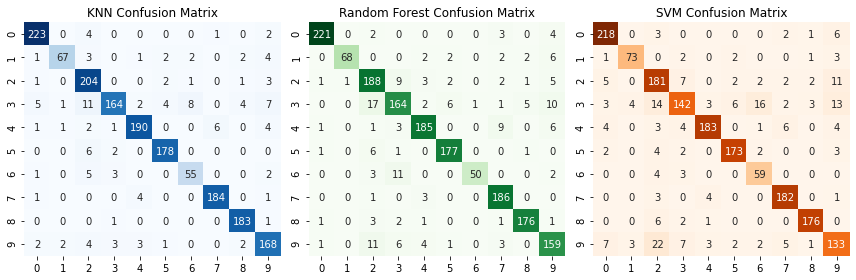

In [132]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')

plt.subplot(132)
sns.heatmap(randomforest_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Confusion Matrix')

plt.subplot(133)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

In [133]:
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Accuracy for k-NN:", knn_accuracy)

SVM Accuracy: 0.8700629650829994
Random Forest Accuracy: 0.9009730967372639
Accuracy for k-NN: 0.9250143102461362


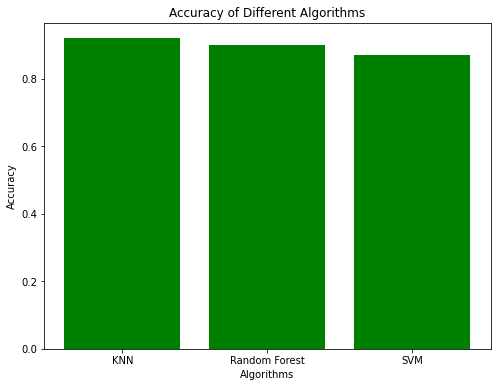

In [134]:
accuracy_scores = [0.92, 0.90, 0.87]  # Replace with your actual accuracy scores

# Algorithms names
algorithms = ['KNN', 'Random Forest', 'SVM']  # Replace with your actual algorithm names

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color='green')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')

# Displaying the plot
plt.show()